<a href="https://colab.research.google.com/github/tenserebel/Machine-Learning-Notebook/blob/main/KNN_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/iris.csv')

In [3]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,NaN,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

In [16]:
df = df.dropna()

In [18]:
x=df.iloc[:,0:3]
y=df['Species']

In [19]:
obj=StandardScaler()

In [20]:
x=obj.fit_transform(x)

In [21]:
le=LabelEncoder()
le.fit_transform(['Iris-setosa','Iris-versicolor','Iris-virginica'])

array([0, 1, 2])

In [22]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.3)

In [23]:
knn=KNeighborsClassifier(n_neighbors=5)

In [24]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [25]:
print(knn.score(xtest,ytest))


0.8444444444444444


In [27]:
ypred=knn.predict(xtest)

In [29]:
metrics.confusion_matrix(ytest,ypred)

array([[13,  0,  0],
       [ 0, 12,  0],
       [ 0,  7, 13]])

In [31]:
k_range=range(1,26)
error1={}
errorlist=[]

In [32]:
for k in k_range:
 knn=KNeighborsClassifier(n_neighbors=k)
 knn.fit(xtrain,ytrain)
 ypred=knn.predict(xtest)
 error1[k]=1-metrics.accuracy_score(ytest,ypred)
 errorlist.append(1-metrics.accuracy_score(ytest,ypred))

Text(0, 0.5, 'Error')

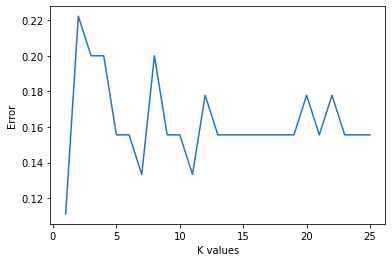

In [34]:
plt.plot(k_range, errorlist)
plt.xlabel("K values")
plt.ylabel("Error")